## Simulated truth data

In [1]:
import numpy as np
import fitsio
import astropy.io
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rcParams
%pylab inline

# DESI modules
import desispec.io

Populating the interactive namespace from numpy and matplotlib


In [2]:
froot = '/project/projectdirs/desi/datachallenge/reference_runs/19.2/'
f_truth = froot + 'targets/truth.fits'

In [3]:
fitsio.FITS(f_truth)


  file: /project/projectdirs/desi/datachallenge/reference_runs/19.2/targets/truth.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      TRUTH
  2      BINARY_TBL      TRUTH_BGS
  3      BINARY_TBL      TRUTH_ELG
  4      BINARY_TBL      TRUTH_LRG
  5      BINARY_TBL      TRUTH_QSO
  6      BINARY_TBL      TRUTH_STAR
  7      BINARY_TBL      TRUTH_WD

In [4]:
truth = Table.read(f_truth, 'TRUTH')
truth_elg = Table.read(f_truth, 'TRUTH_ELG')
truth_bgs = Table.read(f_truth, 'TRUTH_BGS')
truth_lrg = Table.read(f_truth, 'TRUTH_LRG')
truth_qso = Table.read(f_truth, 'TRUTH_QSO')
truth_star = Table.read(f_truth, 'TRUTH_STAR')
truth_wd = Table.read(f_truth, 'TRUTH_WD')

---

In [5]:
print('TRUTH:\n', truth.colnames, '\n')
print('TRUTH_ELG:\n', truth_elg.colnames, '\n')
print('TRUTH_BGS:\n', truth_bgs.colnames, '\n')
print('TRUTH_LRG:\n', truth_lrg.colnames, '\n')
print('TRUTH_QSO:\n', truth_qso.colnames, '\n')
print('TRUTH_STAR:\n', truth_star.colnames, '\n')
print('TRUTH_WD:\n', truth_wd.colnames, '\n')

TRUTH:
 ['TARGETID', 'MOCKID', 'TRUEZ', 'TRUESPECTYPE', 'TEMPLATETYPE', 'TEMPLATESUBTYPE', 'TEMPLATEID', 'SEED', 'MAG', 'MAGFILTER', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'FLUX_W2'] 

TRUTH_ELG:
 ['TARGETID', 'OIIFLUX', 'HBETAFLUX', 'EWOII', 'EWHBETA', 'D4000', 'VDISP', 'OIIDOUBLET', 'OIIIHBETA', 'OIIHBETA', 'NIIHBETA', 'SIIHBETA', 'TRUEZ_NORSD'] 

TRUTH_BGS:
 ['TARGETID', 'OIIFLUX', 'HBETAFLUX', 'EWOII', 'EWHBETA', 'D4000', 'VDISP', 'OIIDOUBLET', 'OIIIHBETA', 'OIIHBETA', 'NIIHBETA', 'SIIHBETA', 'TRUEZ_NORSD'] 

TRUTH_LRG:
 ['TARGETID', 'OIIFLUX', 'HBETAFLUX', 'EWOII', 'EWHBETA', 'D4000', 'VDISP', 'OIIDOUBLET', 'OIIIHBETA', 'OIIHBETA', 'NIIHBETA', 'SIIHBETA', 'TRUEZ_NORSD'] 

TRUTH_QSO:
 ['TARGETID', 'MABS_1450', 'SLOPES', 'EMLINES', 'BAL_TEMPLATEID', 'TRUEZ_NORSD'] 

TRUTH_STAR:
 ['TARGETID', 'TEFF', 'LOGG', 'FEH'] 

TRUTH_WD:
 ['TARGETID', 'TEFF', 'LOGG'] 



- Galaxies (ELG, LRG, BGS) have the same properties.

---

#### TRUTH

In [6]:
truth['TRUESPECTYPE'] = np.char.strip(truth['TRUESPECTYPE'])
truth['TEMPLATETYPE'] = np.char.strip(truth['TEMPLATETYPE'])
truth['TEMPLATESUBTYPE'] = np.char.strip(truth['TEMPLATETYPE'])

In [7]:
print(set(truth['TRUESPECTYPE']))
print(set(truth['TEMPLATETYPE']))
print(set(truth['TEMPLATESUBTYPE'])) # what's this?

{'QSO', 'WD', 'STAR', 'GALAXY'}
{'BGS', 'STAR', 'LRG', 'QSO', 'WD', 'ELG'}
{'BGS', 'STAR', 'LRG', 'QSO', 'WD', 'ELG'}


In [8]:
idx_gal = (truth['TRUESPECTYPE'] == 'GALAXY')
set(truth[idx_gal]['TEMPLATETYPE'])

{'BGS', 'ELG', 'LRG'}

- SpecType = Galaxy -> TemplateType = (BGS, ELG, LRG)

In [9]:
len(set(truth['TEMPLATEID']))

7443

---

#### TRUTH_ELG

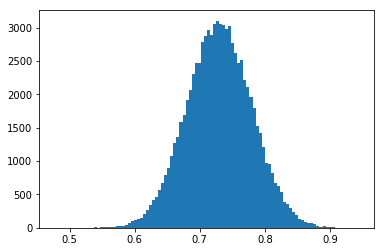

In [13]:
plt.hist(truth_elg['OIIDOUBLET'], bins=100)
plt.show()

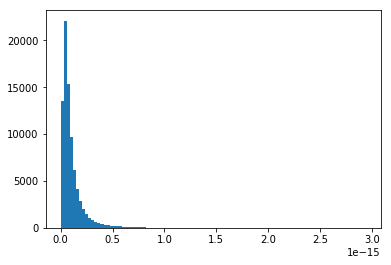

2.35106e-18 2.93705e-15


In [18]:
plt.hist(truth_elg['OIIFLUX'], bins=100)
plt.show()
print(truth_elg['OIIFLUX'].min(), truth_elg['OIIFLUX'].max())